# MODIS Gross Primary Production

1. global land cover types
- 

key features:
- Global Land Cover Types: The dataset identifies different types of land cover, such as forests, grasslands, croplands, urban areas, wetlands, and water bodies. These categories help researchers understand how land is being used or altered, as well as the distribution of natural and human-modified landscapes.

- Annual Updates: The data is produced on a yearly basis from 2001 to 2020, providing a long-term view of land cover changes. This makes it useful for studying trends, such as deforestation, urbanization, agricultural expansion, and natural vegetation shifts due to climate change or human activity.

- Derived from MODIS Data: The dataset is generated using reflectance data collected by the MODIS instruments on NASA's Terra and Aqua satellites. These instruments capture images of Earth's surface in different spectral bands, which are then analyzed to classify different land cover types.

- Supervised Classification: The land cover types are determined using a supervised classification method. This means that pre-labeled training data (where land cover types are already known) is used to guide the classification of satellite imagery, allowing the model to predict land cover types for the entire globe.

- Post-Processing with Prior Knowledge: After the initial classification, the data undergoes additional refinement using ancillary information (e.g., topographic data, climate information) and prior knowledge about specific regions to improve accuracy, especially in cases where certain land cover types may be difficult to distinguish using satellite imagery alone.

- Multiple Classification Schemes: The data product includes land cover classifications according to six different schemes, catering to various research needs. These schemes include widely used classification systems such as:

- International Geosphere-Biosphere Programme (IGBP): Commonly used for ecological and environmental studies.
University of Maryland (UMD): Emphasizes different land cover types useful for vegetation analysis.

- MODIS Land Cover: A MODIS-specific scheme for consistency in land cover monitoring.

Other classification systems tailored for specific studies or applications.

In [17]:
import numpy as np
import pandas as pd

import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
import os

### GPP

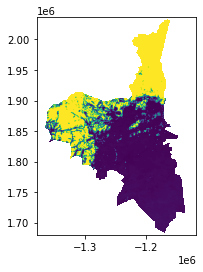

CRS (Coordinate Reference System): PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Transform: | 463.31, 0.00,-1378818.64|
| 0.00,-463.31, 2036259.39|
| 0.00, 0.00, 1.00|
Width: 565
Height: 769
Data shape: (769, 565)


In [ ]:
with rasterio.open('Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif') as dataset:
    # visualize tif data
    show(dataset)
    
    # obtain geographical info
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  # projection matrix
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # read data
    data = dataset.read(1)  # read 
    print("Data shape:", data.shape)

In [43]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

# 1. Open both files
with rasterio.open('Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif') as src_landcover:
    with rasterio.open('Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif') as src_climate:
        
        # 2. Choose which dataset to use as the reference (target)
        # Usually you'd choose the higher resolution one
        # For this example, let's use landcover as the reference
        
        # Get the metadata from the reference file
        dst_crs = src_landcover.crs
        dst_transform = src_landcover.transform
        dst_height = src_landcover.height
        dst_width = src_landcover.width
        
        # 3. Create a destination array for the reprojected climate data
        dst_climate = np.zeros((dst_height, dst_width), dtype=rasterio.float32)
        
        # 4. Reproject the climate data to match the landcover data
        reproject(
            source=rasterio.band(src_climate, 1),
            destination=dst_climate,
            src_transform=src_climate.transform,
            src_crs=src_climate.crs,
            dst_transform=dst_transform,
            dst_crs=dst_crs,
            resampling=Resampling.bilinear  # Choose appropriate resampling method
        )
        
        # 5. Now dst_climate and src_landcover.read(1) should be aligned
        landcover_data = src_landcover.read(1)
        
        # 6. Now you can extract and compare data for the same pixels
        # For example, to get pixel values at position (100, 100):
        lc_value = landcover_data[100, 100]
        climate_value = dst_climate[100, 100]
        
        print(f"Land cover value: {lc_value}")
        print(f"Climate value: {climate_value}")
        
        # 7. Optional: Save the reprojected climate data
        profile = src_landcover.profile.copy()
        profile.update(dtype=rasterio.float32, count=1)
        
        with rasterio.open('climate_reprojected.tif', 'w', **profile) as dst:
            dst.write(dst_climate, 1)


Land cover value: 65535
Climate value: -3.4028234663852886e+38


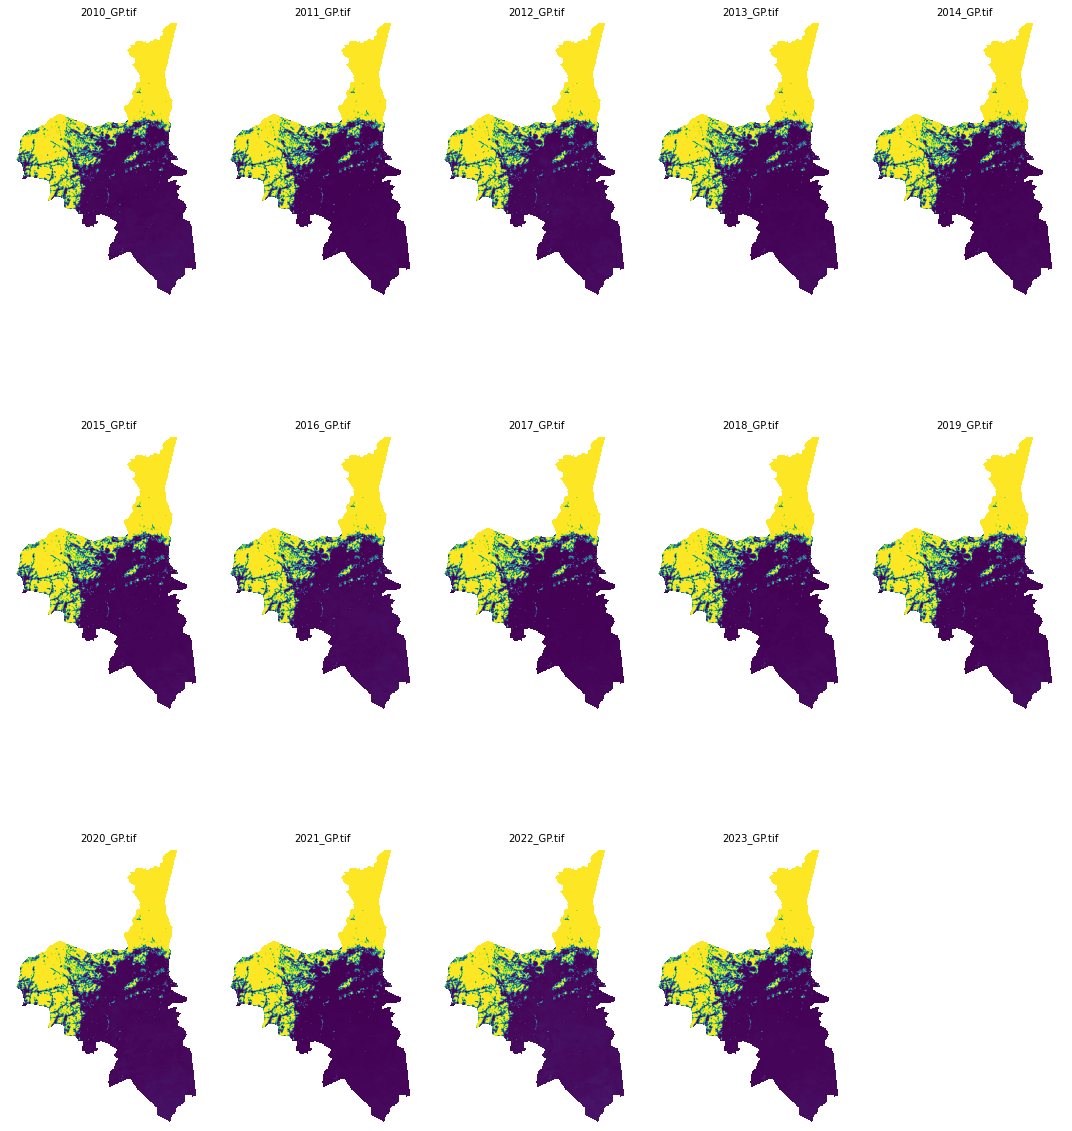

In [28]:
# path for GPP folder
folder_path = 'Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x[:4]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()


### Land cover

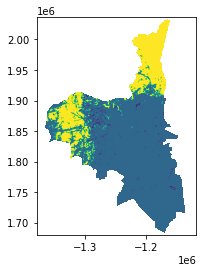

CRS (Coordinate Reference System): PROJCS["Unknown_datum_based_upon_the_custom_spheroid_Sinusoidal",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Transform: | 463.31, 0.00,-1378818.64|
| 0.00,-463.31, 2036259.39|
| 0.00, 0.00, 1.00|
Width: 565
Height: 769
Data shape: (769, 565)


In [26]:
with rasterio.open('Datasets_Hackathon/Modis_Land_Cover_Data/2010LCT.tif') as dataset:
    # 
    show(dataset)
        
    # 
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  # 
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # 
    data = dataset.read(1)  # 
    print("Data shape:", data.shape)

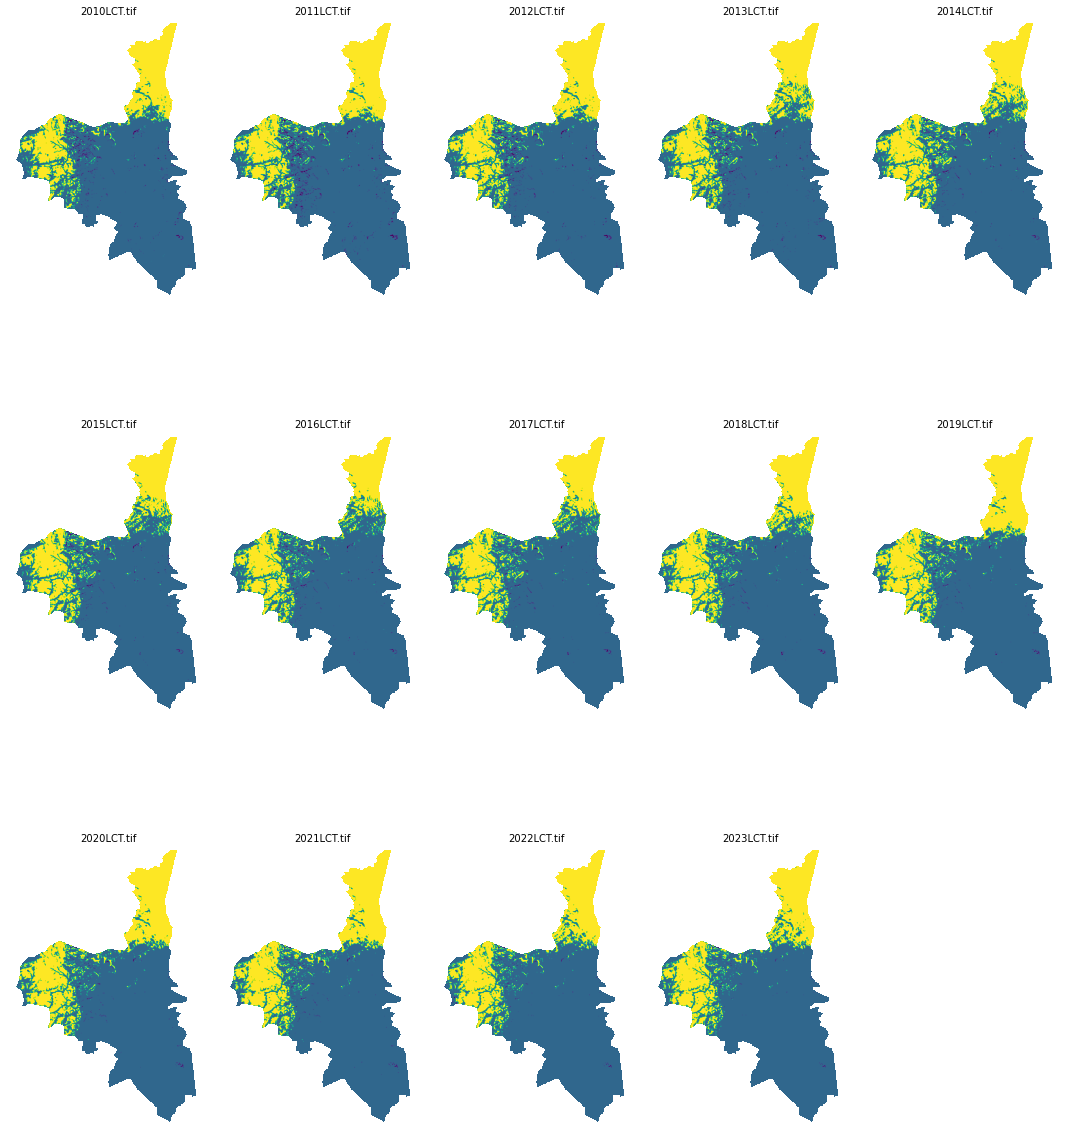

In [33]:
# path for Land Cover folder
folder_path = 'Datasets_Hackathon/Modis_Land_Cover_Data/'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x[:4]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()


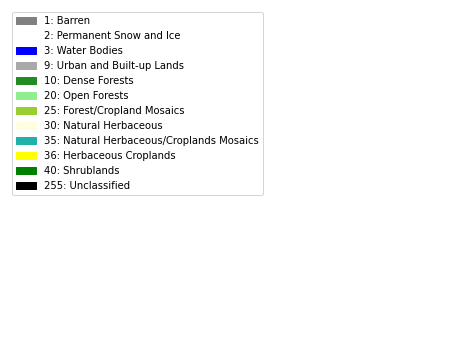

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Land cover classes with their corresponding names
fao_land_cover_classes = {
    1: "Barren",
    2: "Permanent Snow and Ice",
    3: "Water Bodies",
    9: "Urban and Built-up Lands",
    10: "Dense Forests",
    20: "Open Forests",
    25: "Forest/Cropland Mosaics",
    30: "Natural Herbaceous",
    35: "Natural Herbaceous/Croplands Mosaics",
    36: "Herbaceous Croplands",
    40: "Shrublands",
    255: "Unclassified"
}

# Define a color palette for each FAO land cover class
fao_colors = [
    'gray', 'white', 'blue', 'darkgray', 'forestgreen', 'lightgreen', 
    'yellowgreen', 'lightyellow', 'lightseagreen', 'yellow', 'green', 'black'
]

# Create a figure for the legend
plt.figure(figsize=(8, 6))

# Create patches for the legend (color rectangles with corresponding labels)
patches = []
for i, (land_type, name) in enumerate(fao_land_cover_classes.items()):
    patches.append(mpatches.Patch(color=fao_colors[i], label=f"{land_type}: {name}"))

# Add legend to the plot
plt.legend(handles=patches, loc='upper left', fontsize=10)

# Remove axes and display the legend
plt.axis('off')
plt.show()
